# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.


Determine Business Objectives :

Background : Identifying key drivers for used car prices and create a predictive model for used car prices.

Business Objectives: Creating the statistical model for determining the used car prices in the market.

Business Success Criteria: Predicting the used car prices using the statistical model


Assess Situation : Analyzing the dataset for understanding the key features which influence the used car prices

Inventory of Resources : The dataset is provided by Kaggle, other python libraries

Requirements : Creating a statiscal model for predicting the used car prices for dealership

Assumptions and Constraints : Provided dataset is the representative of the used car Market

Risk and Contignences : Provided dataset should represent the the market properly, and the model should capture the complex rellationship between features and price,
                        and the model should predict price correctly

Terminology : features, prices, predictive models, analysis, EDA, statistical modulesbyfile

Cost and benefits : Computational resources for training, processing and deployment. Predicting the used car price accurately based on the given dataset.
                    Dealership can make a better business decisions  based on this pricing model


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#Importing packages

In [6]:


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
from scipy import stats


import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (15,9)
plt.style.use("fivethirtyeight")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# prepare data
from sklearn.model_selection import train_test_split

# model
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

import warnings
warnings.filterwarnings("ignore")

print("All modules loaded")

All modules loaded


#Reading data

In [7]:
df = pd.read_csv('data/vehicles.csv')

In [8]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

#Data Cleaning

In [5]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(" ", "_")

In [9]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.shape

(426880, 18)

In [10]:
df = df.drop_duplicates()
df.shape

(426880, 18)

In [9]:
df.isna().mean()

,0
id,0.00
region,0.00
price,0.00
year,0.00
manufacturer,0.04
model,0.01
condition,0.41
cylinders,0.42
fuel,0.01
odometer,0.01


#Heatmap for the null values

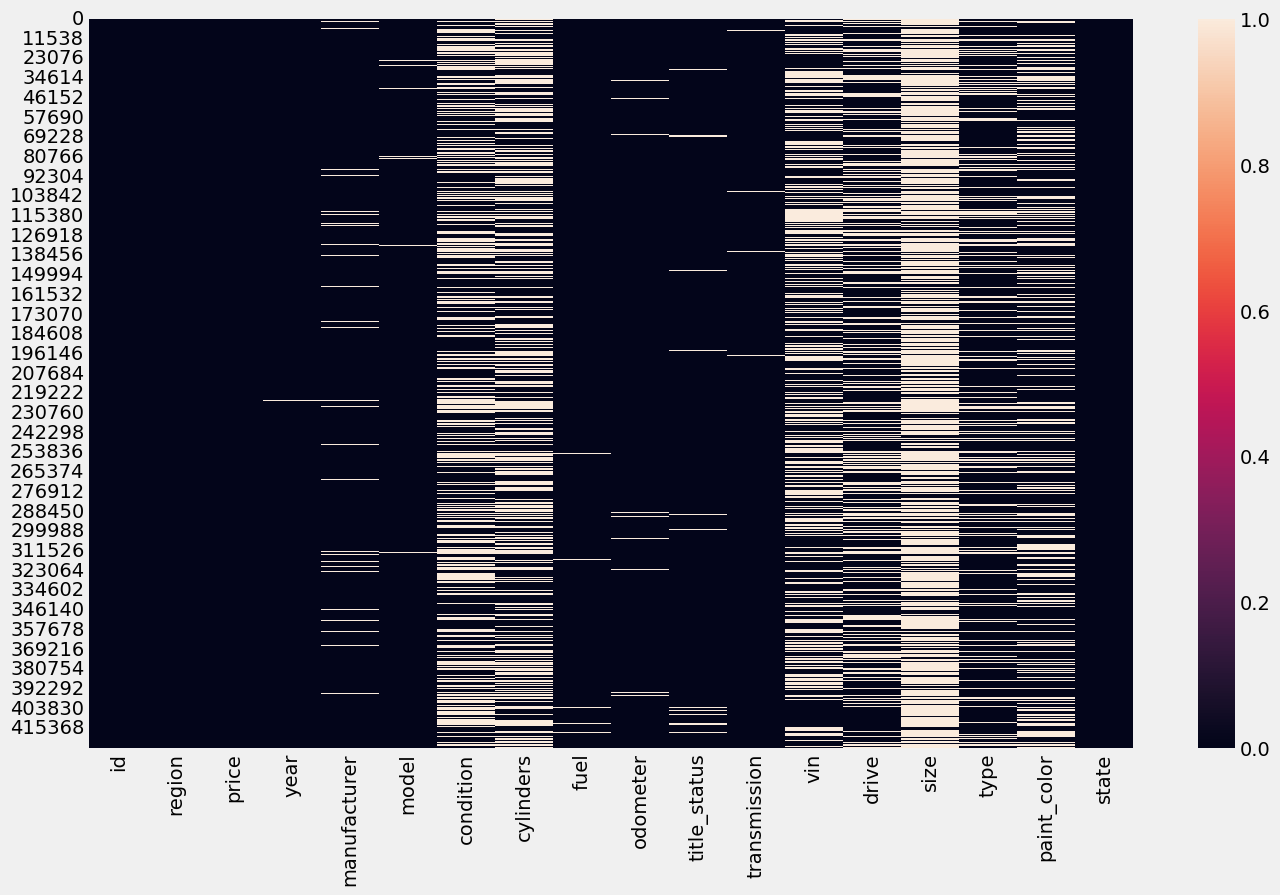

In [19]:
sns.heatmap(df.isna());

#Analysing target variable

In [20]:
df['price'].describe()

,price
count,426880.00
mean,75199.03
std,12182282.17
min,0.00
25%,5900.00
50%,13950.00
75%,26485.75
max,3736928711.00


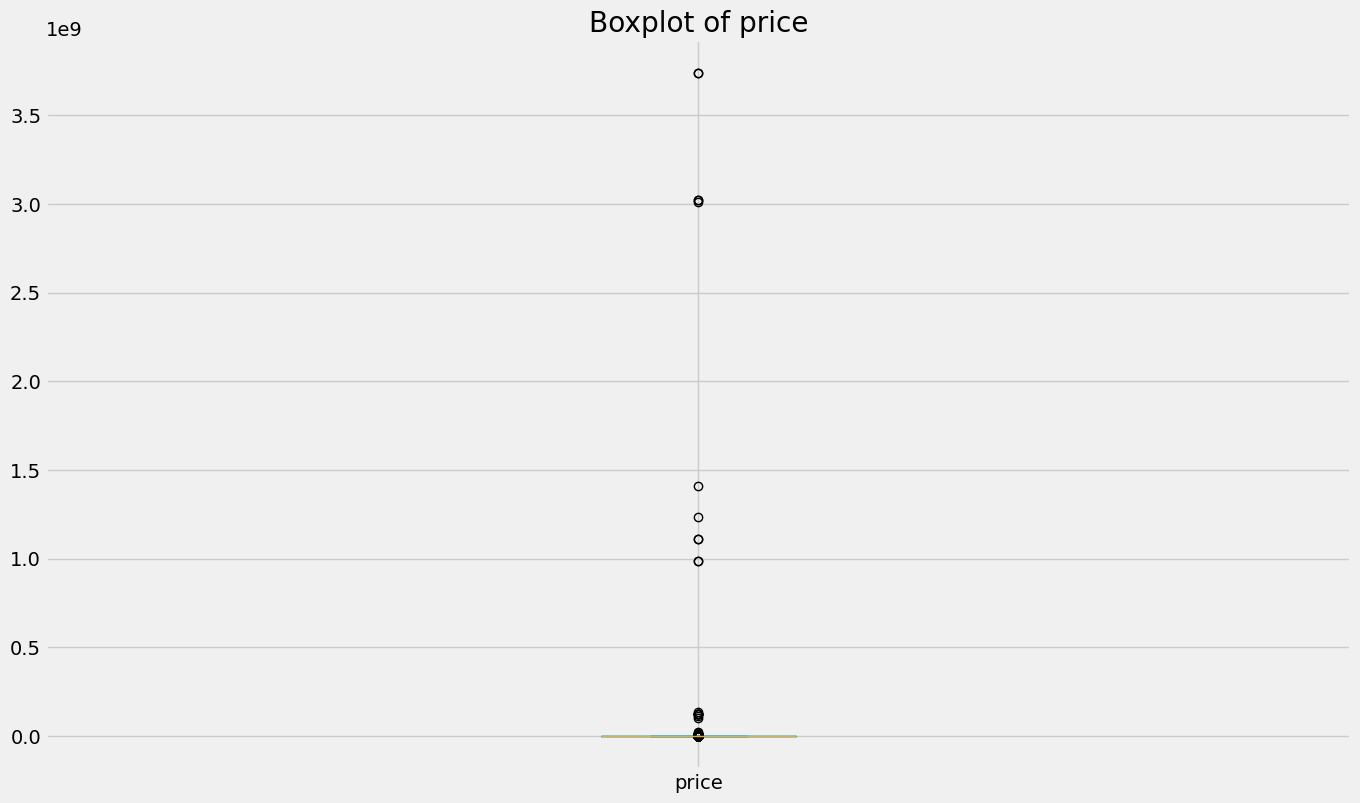

In [21]:
df['price'].plot(kind = 'box', vert = True, title = "Boxplot of price");

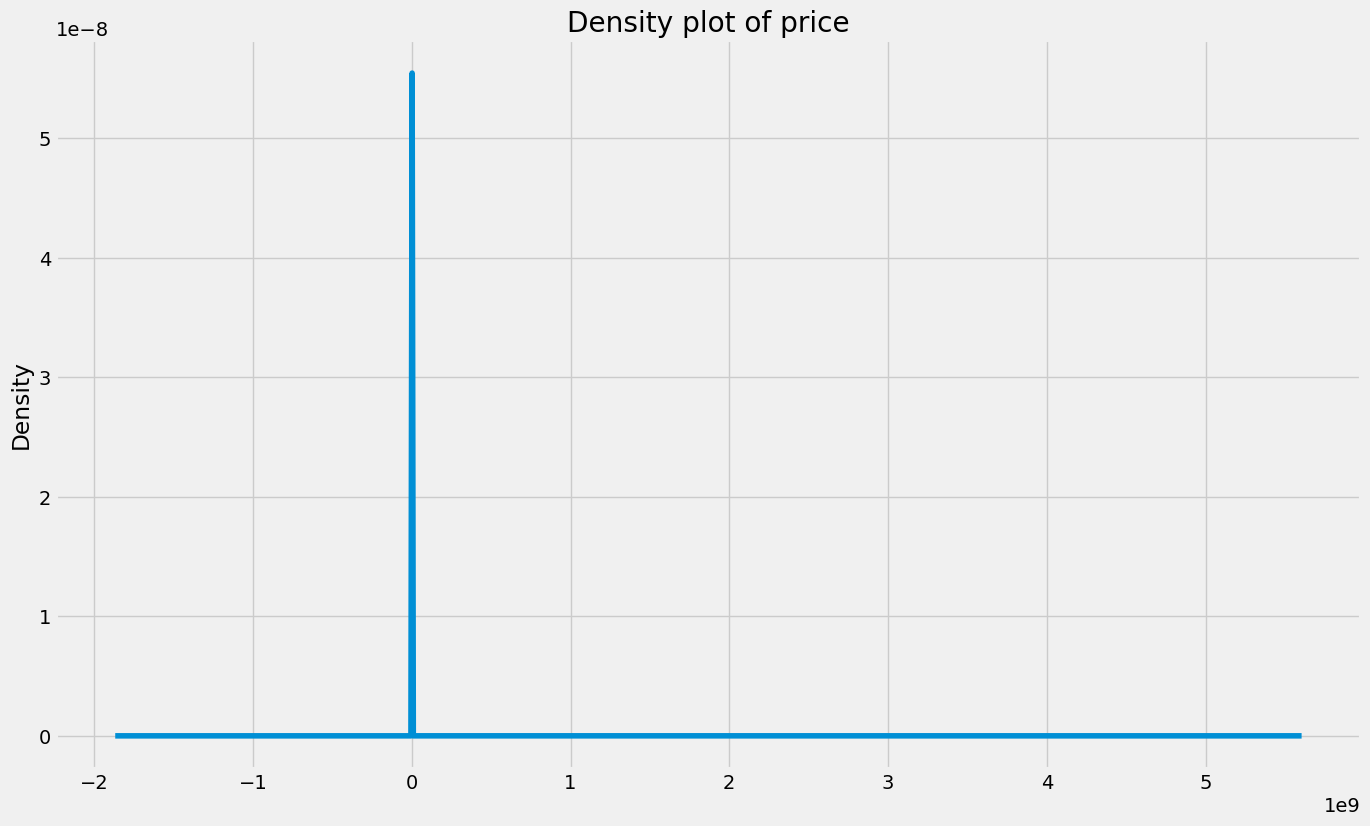

In [22]:
df['price'].plot(kind = 'density', title = "Density plot of price");

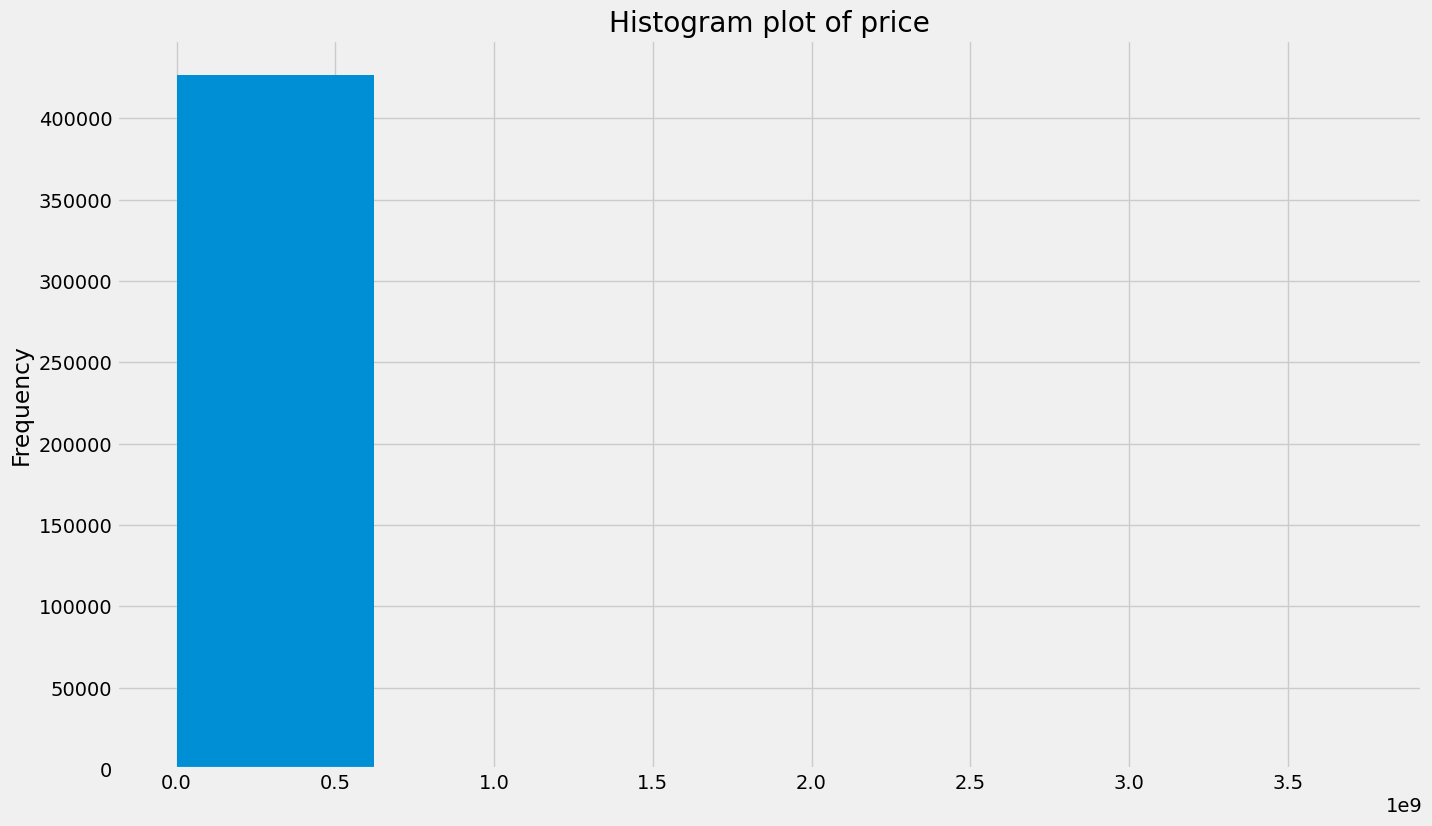

In [23]:
df['price'].plot(kind = 'hist', bins = 6, title = "Histogram plot of price");

In [11]:
df["price_log"] = np.log(df['price'])

In [13]:
df.head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,price_log
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,8.70
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,9.38
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,9.95
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,7.31
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,8.50


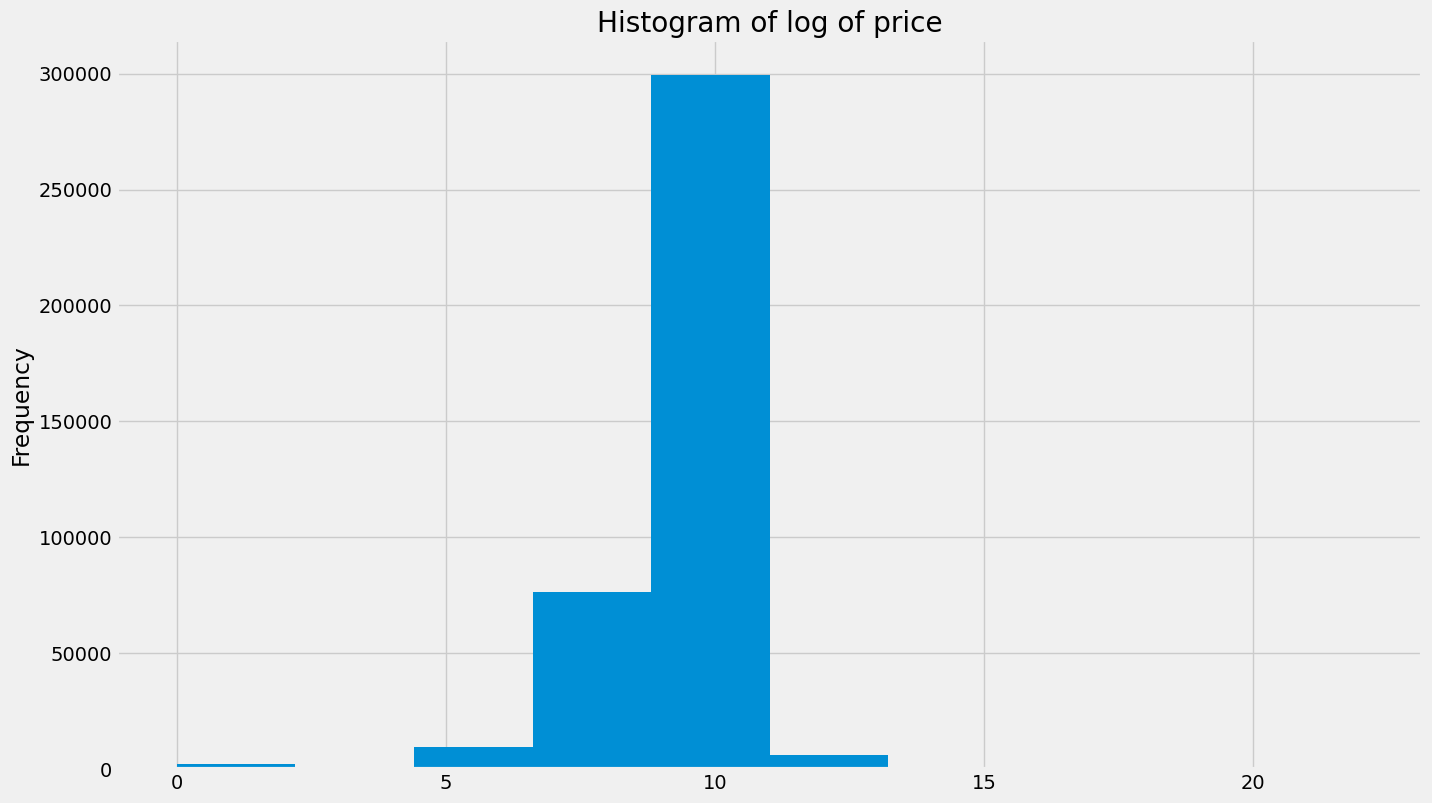

In [25]:
finite_data = df[np.isfinite(df['price_log'])]
finite_data['price_log'].plot(kind = 'hist', title = "Histogram of log of price");

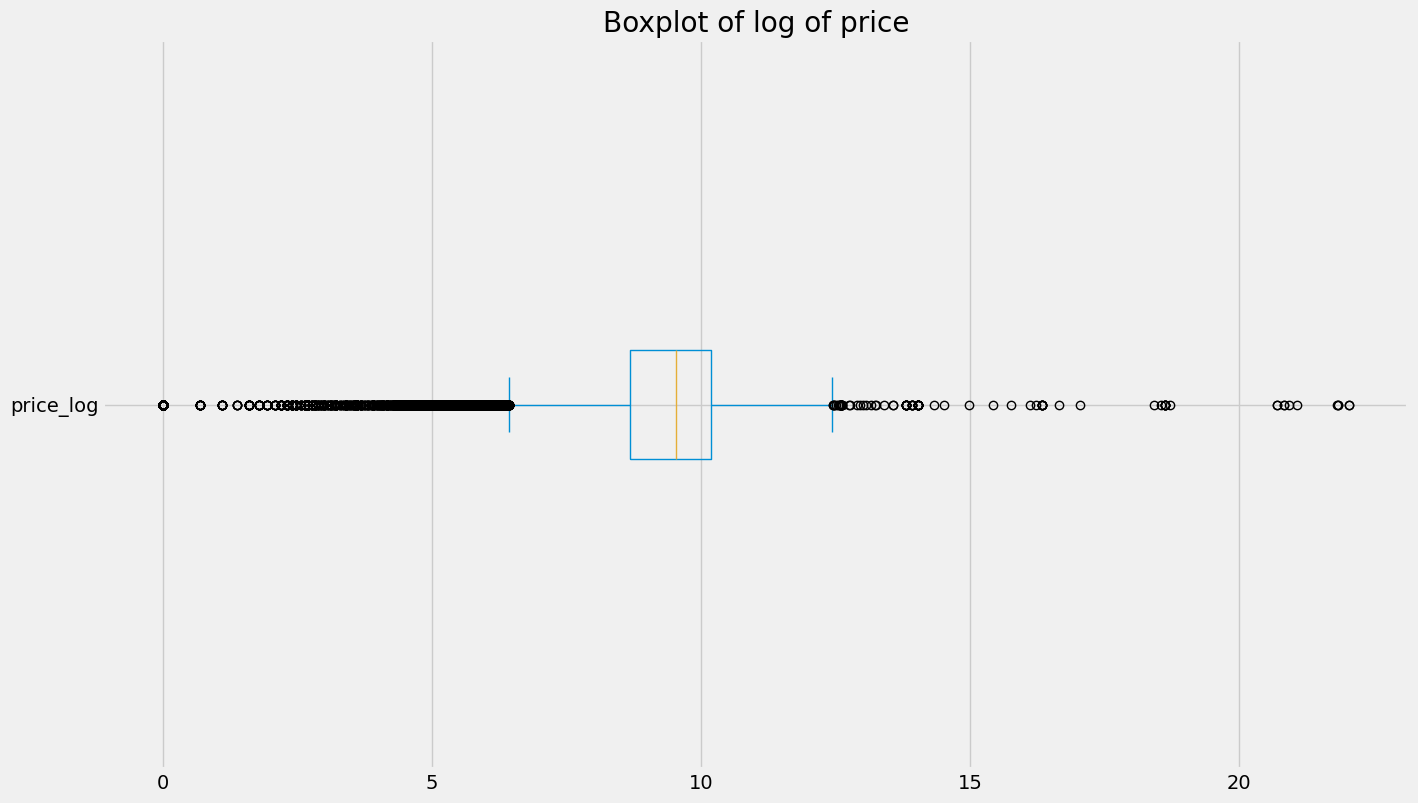

In [26]:
df['price_log'].plot(kind = 'box', vert = False, title = "Boxplot of log of price");

#Outlier removal

In [12]:
iqr = df['price'].quantile(.75) - df['price'].quantile(.25)
iqr

np.float64(20585.75)

In [13]:
lower_bound = df['price'].quantile(.25) - 1.5 * iqr
upper_bound = df['price'].quantile(.75) + 1.5 * iqr

In [14]:
df_iqr = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)].copy()

In [15]:
iqr_data_lost = 1-(df_iqr.shape[0]/df.shape[0])
print("We lost {:.2%} of the data by the IQR method".format(iqr_data_lost))

We lost 1.92% of the data by the IQR method


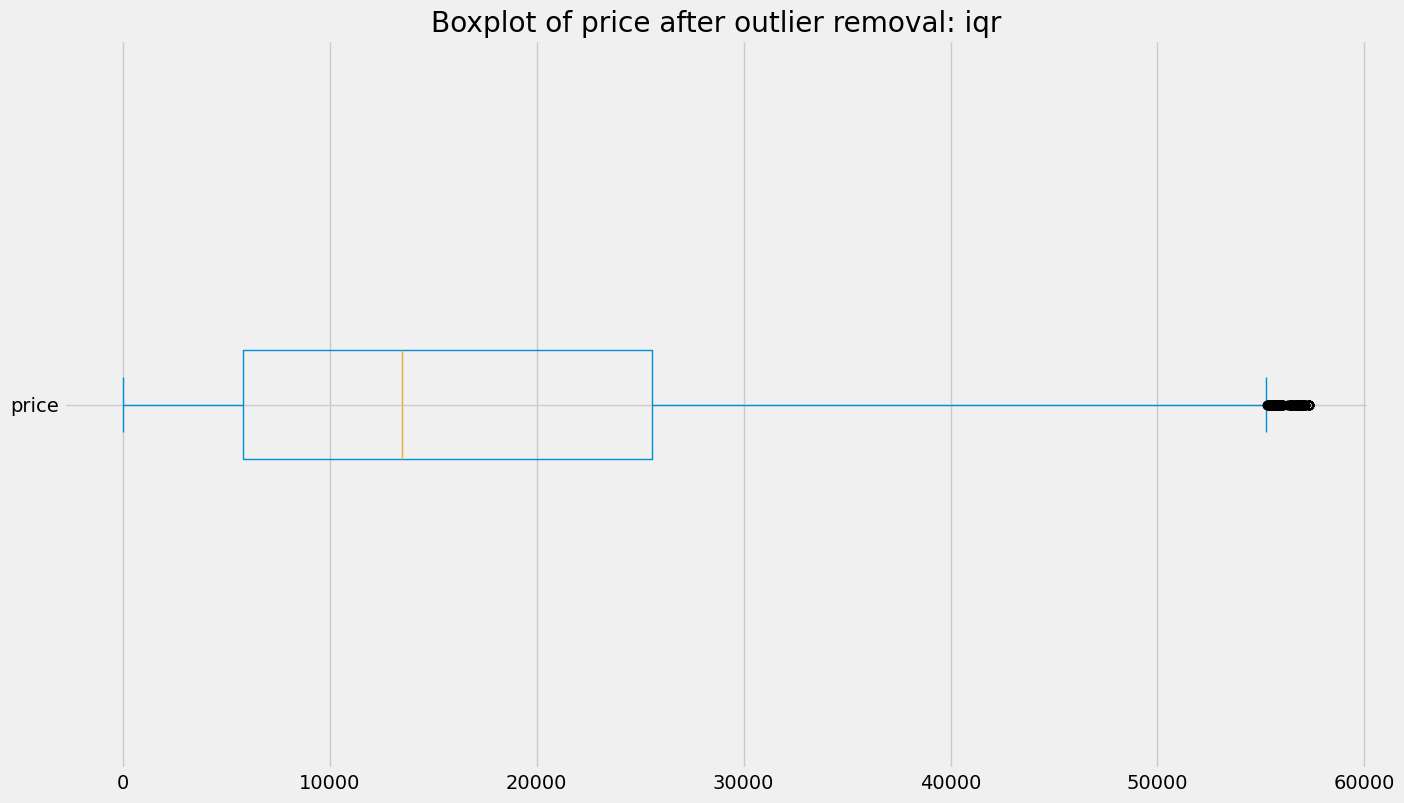

In [16]:
df_iqr['price'].plot(kind = 'box', vert = False, title = "Boxplot of price after outlier removal: iqr");

#Bivariate Analysis

#Numeric value Analysis

#Heatmp for corrlelation between numeric columns


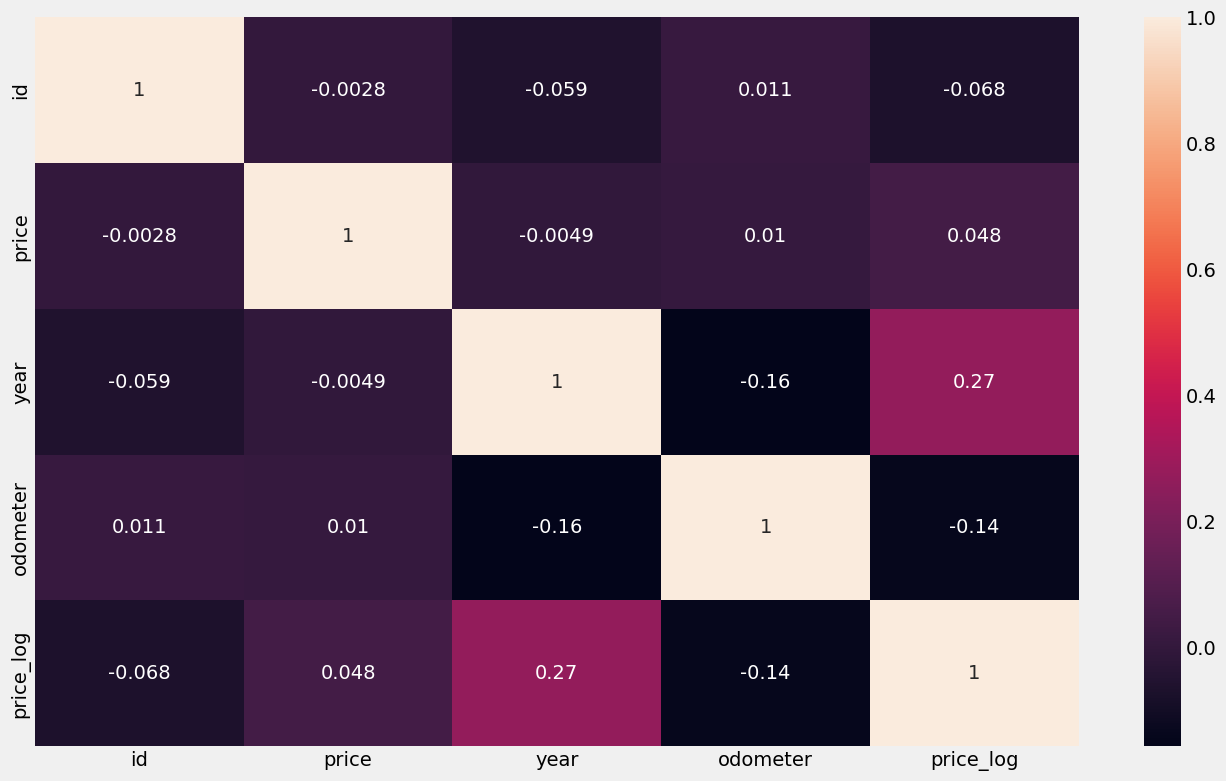

In [35]:
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot = True);

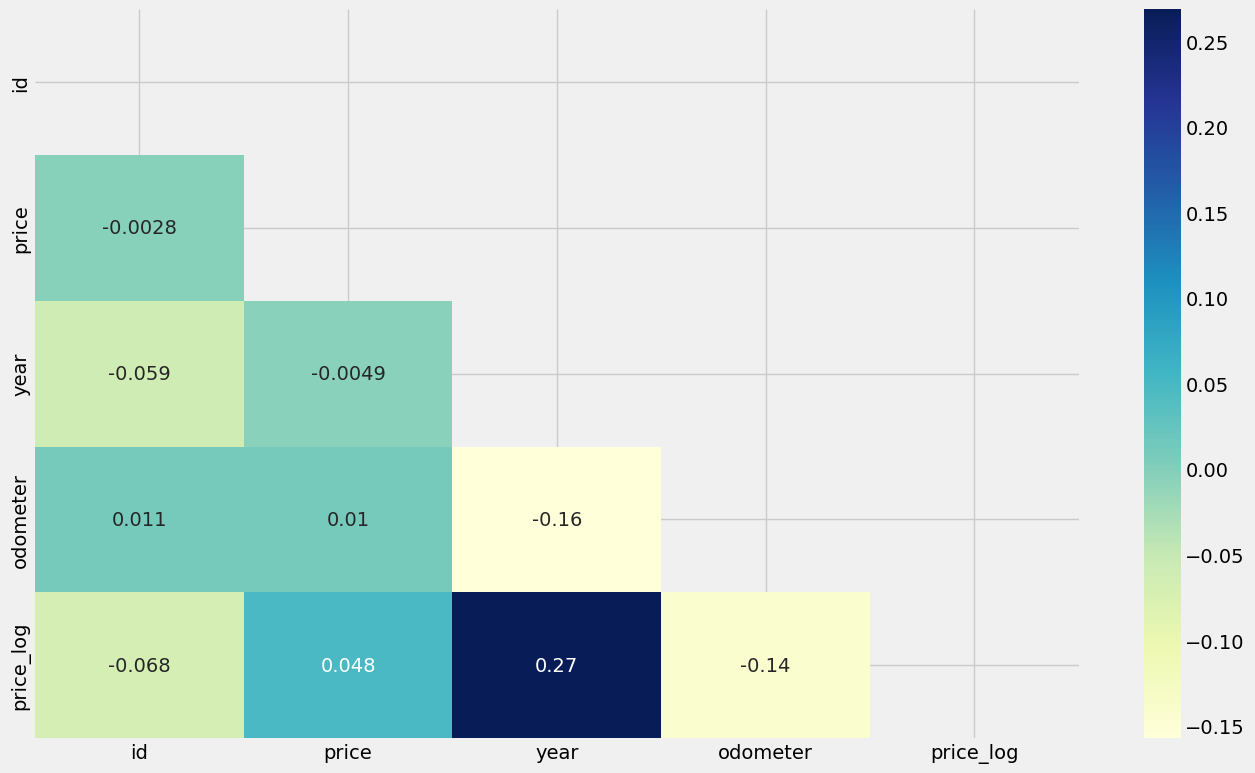

In [36]:
triangular = np.triu(np.ones_like(df.corr(numeric_only = True).round(2)))
sns.heatmap(corr, annot=True, mask=triangular, cmap="YlGnBu");

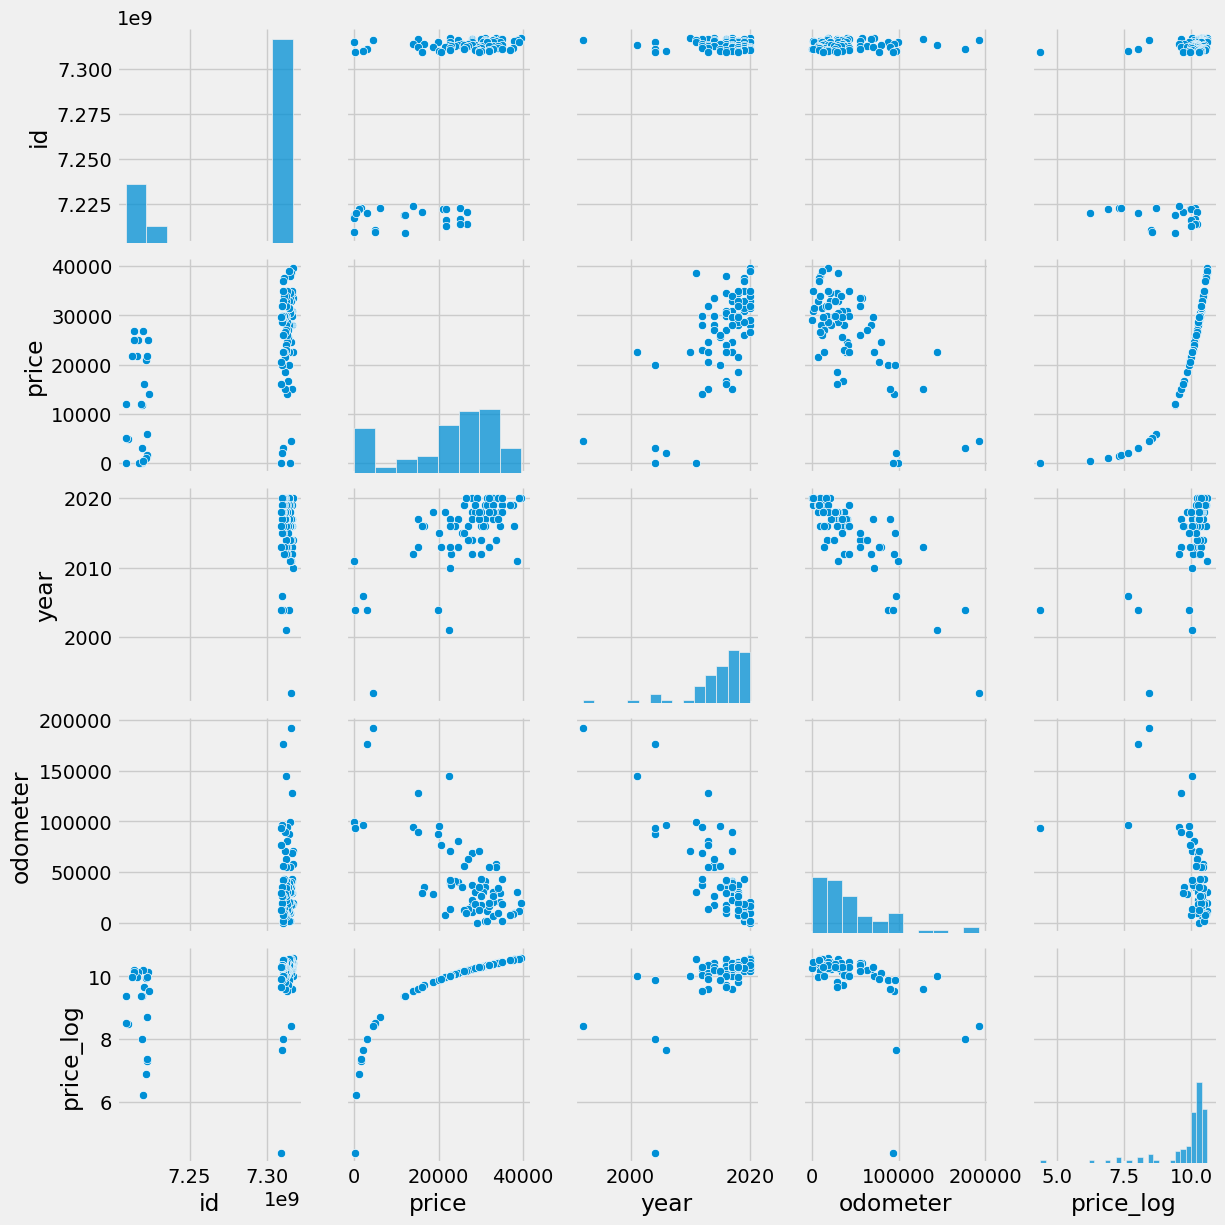

In [37]:
sns.pairplot(df[0:100]);

#Categorical value Analysis

In [48]:
df.groupby('cylinders')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
10 cylinders,1455.00,21507.80,30402.25,0.00,4995.00,14995.00,28944.00,299991.00
12 cylinders,209.00,54299.38,72929.80,0.00,10000.00,28990.00,65995.00,516999.00
3 cylinders,655.00,12297.00,12257.64,0.00,5000.00,9990.00,17989.50,128995.00
4 cylinders,77642.00,10545.30,27386.81,0.00,4750.00,8500.00,14577.50,6995495.00
5 cylinders,1712.00,7842.78,11744.33,0.00,3995.00,6200.00,8999.00,400123.00
6 cylinders,94169.00,58696.32,12184436.99,0.00,5500.00,13995.00,27655.00,3736928711.00
8 cylinders,72062.00,139595.72,18371107.63,0.00,7900.00,18900.00,33895.00,3736928711.00
other,1298.00,17110.08,19435.71,0.00,2650.00,9991.50,24999.00,130000.00


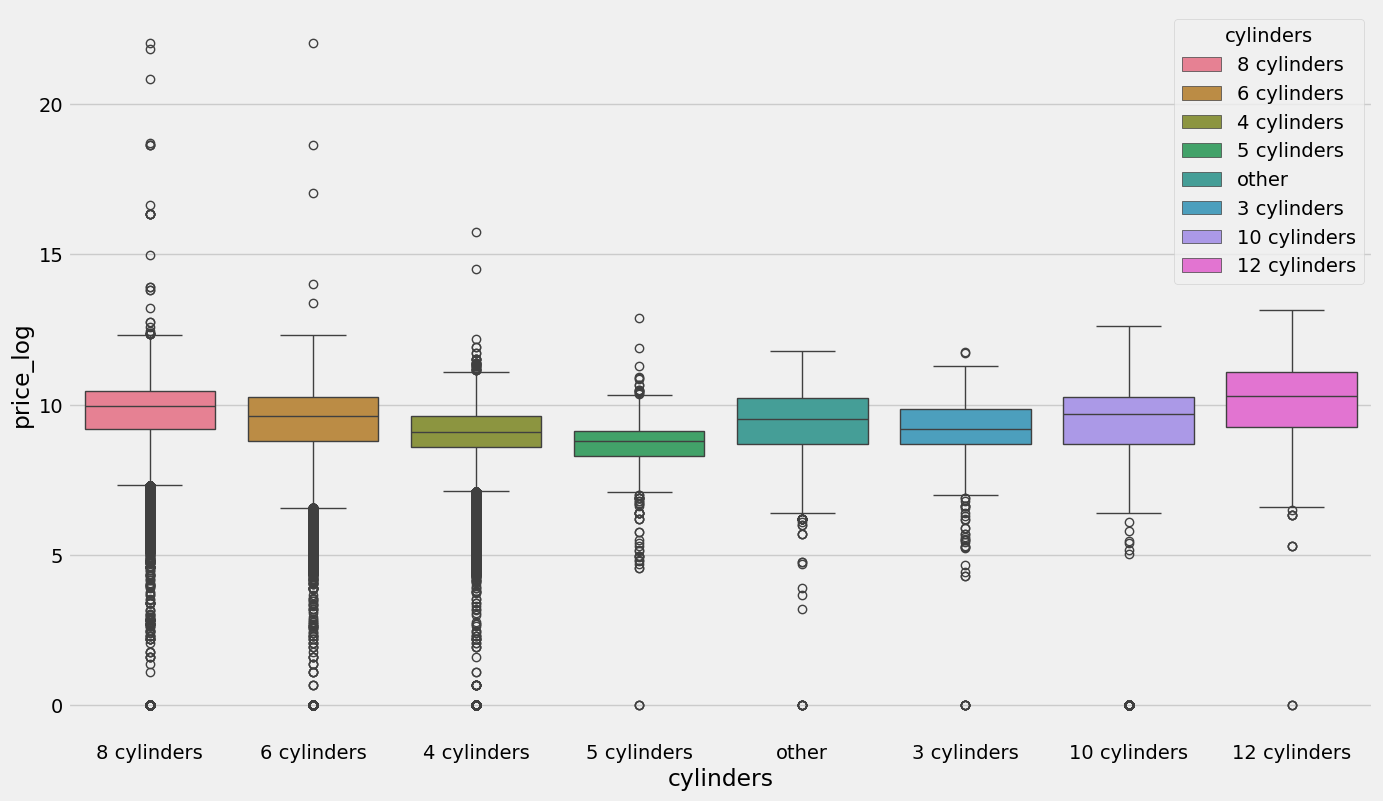

In [27]:
sns.boxplot(x = 'cylinders', y = 'price_log', data = df, hue = "cylinders");

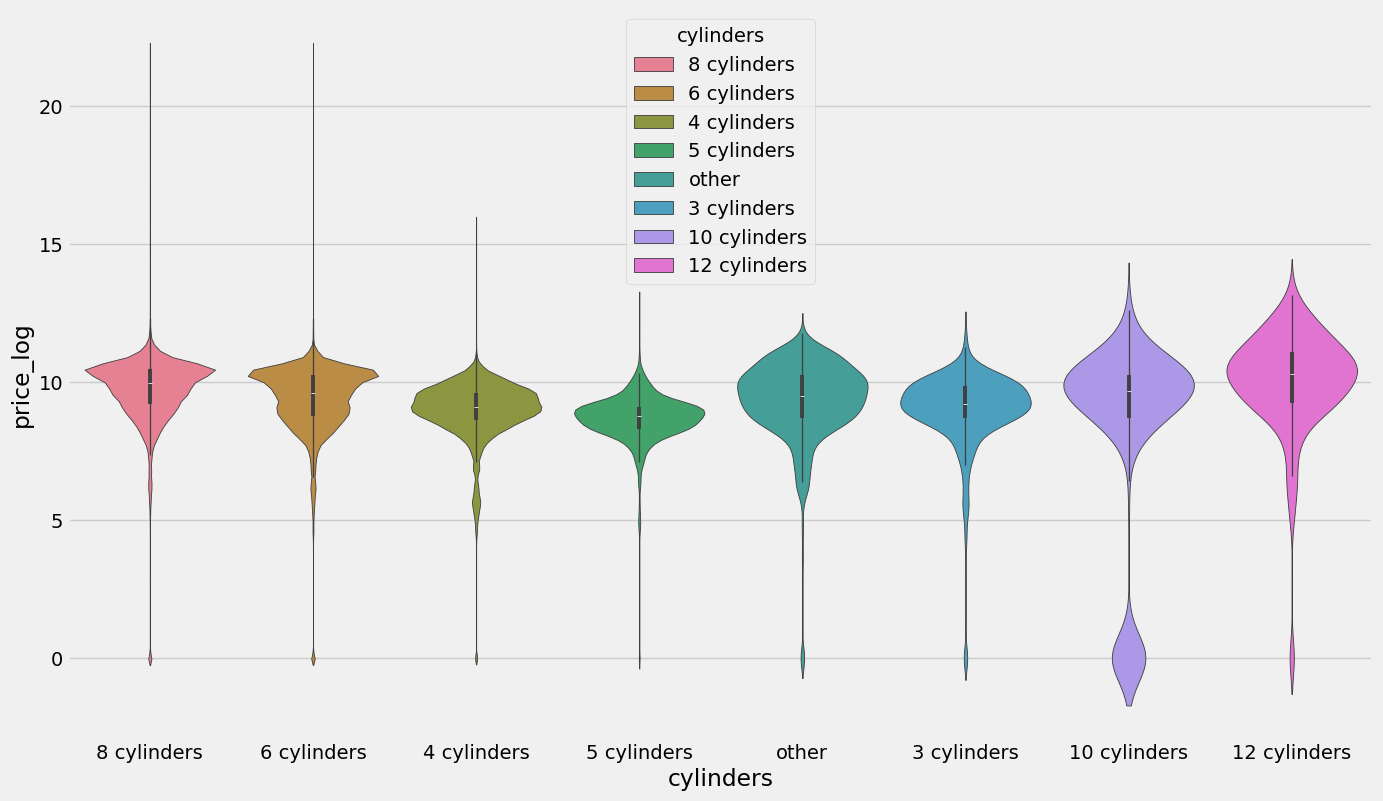

In [50]:
sns.violinplot(x = 'cylinders', y = 'price_log', data = df, hue = "cylinders");

#Data Preprocessing

In [17]:
numerics = df_iqr.select_dtypes(['int', 'float']).drop(columns = ['price_log']).columns.to_list()
df_numeric = df_iqr[numerics].copy()
df_numeric.head()


,id,price,year,odometer
0,7222695916,6000,NaN,NaN
1,7218891961,11900,NaN,NaN
2,7221797935,21000,NaN,NaN
3,7222270760,1500,NaN,NaN
4,7210384030,4900,NaN,NaN


In [18]:
X = df_numeric.drop(columns = 'price')
y = df_numeric['price']
y.head()

,price
0,6000
1,11900
2,21000
3,1500
4,4900


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
print(X_train.shape)
print(y_train.shape)

(334962, 3)
(334962,)


In [68]:
X_test.isna().sum()


,0
id,0
year,198
odometer,815


#SimpleImputer for replacing null values with mean

---



In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean').set_output(transform="pandas") # this will ensure a pandas output rather than numpy

In [21]:
# fit and transform
X_train = imputer.fit_transform(X_train)

# on the test data
X_test = imputer.transform(X_test)

In [27]:
print(X_train.isna().sum())

id          0
year        0
odometer    0
dtype: int64


In [43]:
X_test.isna().sum()

,0
id,0
year,0
odometer,0


#Dummy Regressor and Cross validation

---



In [23]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

In [24]:
y_test.mean().round(2)

np.float64(16371.05)

In [78]:
dummy = DummyRegressor()

In [79]:
dummy.fit(X_train, y_train)

# R^2 of the model
dummy_r2 = dummy.score(X_train, y_train)
print("The value of lr_r2 is {:.2f}".format(dummy_r2))

# Predictions on test
dummy_predict = dummy.predict(X_test)

# rmse
dummy_rmse = np.sqrt(mean_squared_error(y_test, dummy_predict))
print("The value of dummy rmse on test data is {:.2f}".format(dummy_rmse))

The value of lr_r2 is 0.00
The value of dummy rmse on test data is 13152.91


In [80]:
x = list(range(0, len(y_test)))

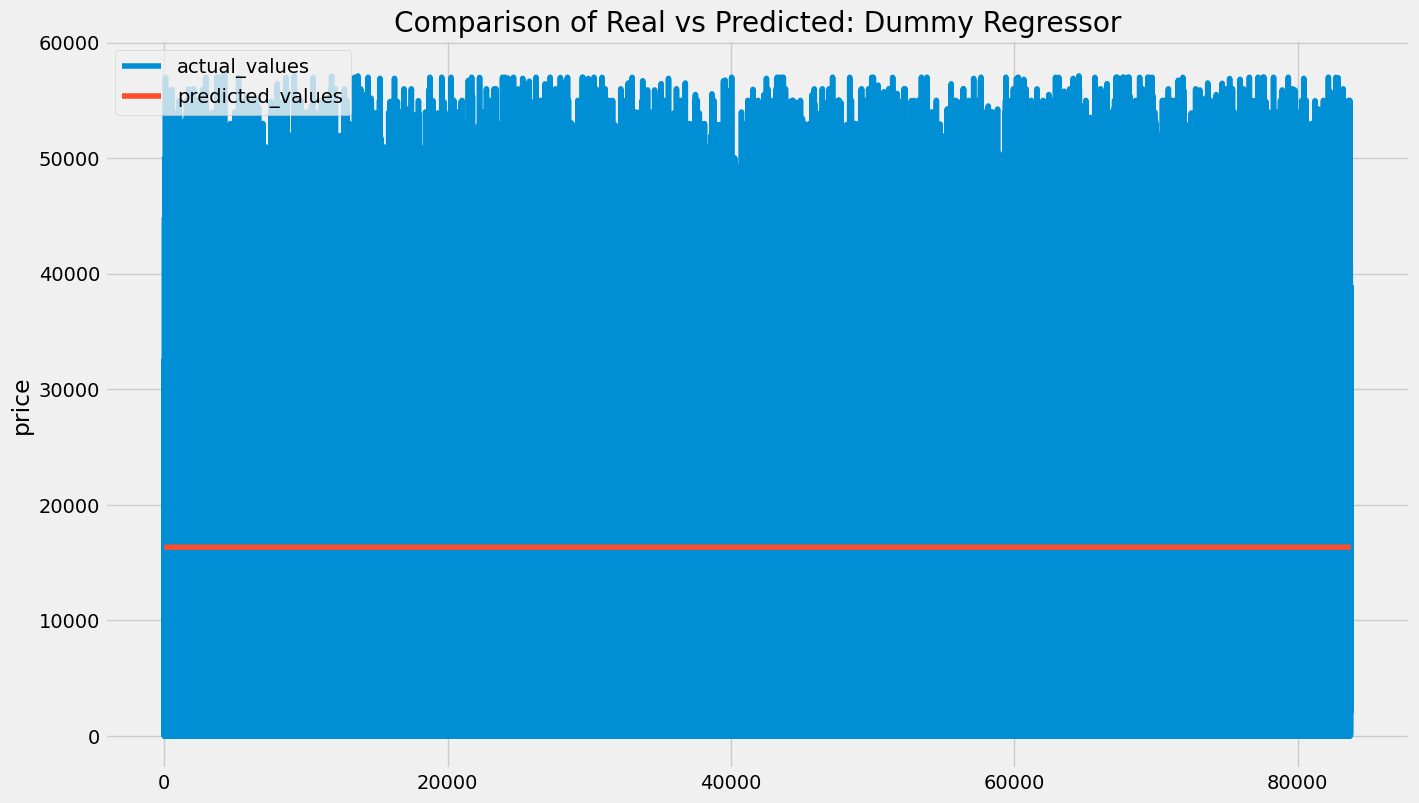

In [81]:
sns.lineplot(x = x, y = y_test, label = 'actual_values');
sns.lineplot(x = x, y = dummy_predict, label = 'predicted_values');

plt.title("Comparison of Real vs Predicted: Dummy Regressor");

#Modelling with Linear Regression

In [83]:
lr = LinearRegression()

In [84]:
# fit the model
lr.fit(X_train, y_train)

# R^2 of the model
lr_r2 = (lr.score(X_train, y_train))
print("The value of lr_r2 is {:.2f}".format(lr_r2))

# Predictions on test
lr_predict = lr.predict(X_test)

# rmse
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predict))
print("The value of lr rmse on test is {:.2f}".format(lr_rmse))

The value of lr_r2 is 0.11
The value of lr rmse on test is 12415.27


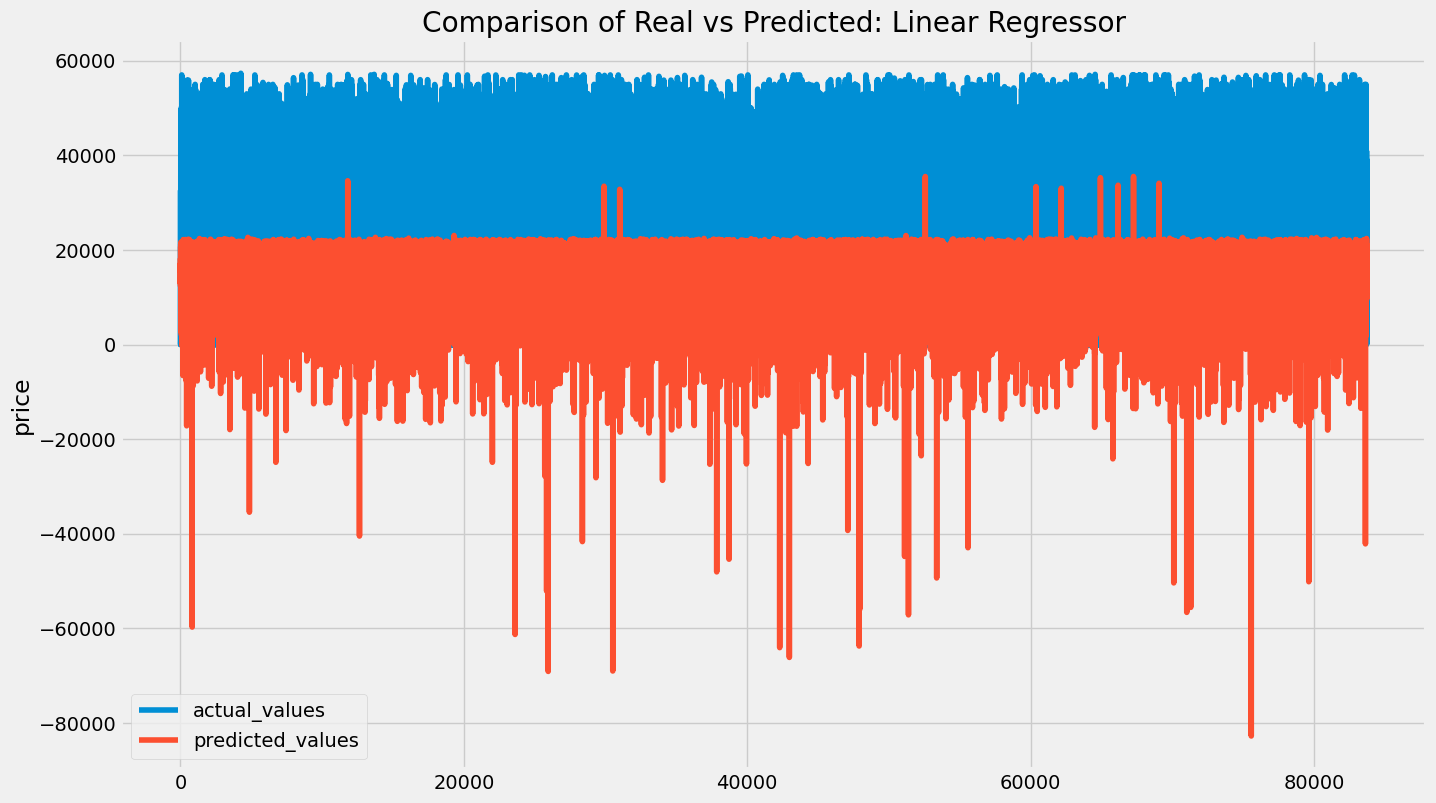

In [85]:
sns.lineplot(x = x, y = y_test, label = "actual_values");
sns.lineplot(x = x, y = lr_predict, label = "predicted_values");

plt.title("Comparison of Real vs Predicted: Linear Regressor");

#Handling catagorical values using get_dummies

In [22]:
df_encoded_int = pd.get_dummies(df_iqr, columns=['manufacturer','condition', 'cylinders', 'transmission', 'drive', 'size', 'paint_color'], dtype=int)

In [47]:
df_encoded_int.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418703 entries, 0 to 426879
Data columns (total 90 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            418703 non-null  int64  
 1   region                        418703 non-null  object 
 2   price                         418703 non-null  int64  
 3   year                          417691 non-null  float64
 4   model                         413770 non-null  object 
 5   fuel                          415737 non-null  object 
 6   odometer                      414381 non-null  float64
 7   title_status                  410674 non-null  object 
 8   vin                           259691 non-null  object 
 9   type                          327642 non-null  object 
 10  state                         418703 non-null  object 
 11  price_log                     418703 non-null  float64
 12  manufacturer_acura            418703 non-null  in

In [23]:
numeric_cols = df_encoded_int.select_dtypes(['int', 'float']).columns.to_list()
df_encoded_num = df_encoded_int[numeric_cols].copy()
df_encoded_num.head()
df_encoded_num.drop(columns = 'price_log', inplace = True)

In [49]:
df_encoded_num.shape

(418703, 82)

In [24]:
X = df_encoded_num.drop('price', axis = 1)
y = df_encoded_num['price']

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
### END SOLUTION

# Answer check
print(X_train.shape)
print(X_test.shape)

(293092, 81)
(125611, 81)


In [26]:
# fit and transform
X_train = imputer.fit_transform(X_train)

# on the test data
X_test = imputer.transform(X_test)


#Defining the Baseline

In [53]:
baseline_train = ''
baseline_test = ''
mse_baseline_train = ''
mse_baseline_test = ''

### BEGIN SOLUTION
baseline_train = np.ones(shape = y_train.shape)*y_train.mean()
baseline_test = np.ones(shape = y_test.shape)*y_test.mean()
rmse_baseline_train = np.sqrt(mean_squared_error(baseline_train, y_train))
rmse_baseline_test = np.sqrt(mean_squared_error(baseline_test, y_test))
### END SOLUTION

# Answer check
print(baseline_train.shape, baseline_test.shape)
print(f'Baseline for training data: {rmse_baseline_train}')
print(f'Baseline for testing data: {rmse_baseline_test}')

(293092,) (125611,)
Baseline for training data: 13131.593240792019
Baseline for testing data: 13187.473949584584


#Finding the top 7 highest correlated features

In [55]:
### BEGIN SOLUTION
highest_corr = df_encoded_num.corr()[['price']].nlargest(columns = 'price', n = 7)
### END SOLUTION

# Answer check
print(highest_corr.index)
print(type(highest_corr))

Index(['price', 'transmission_other', 'year', 'condition_good', 'drive_4wd',
       'manufacturer_ram', 'cylinders_8 cylinders'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>


In [56]:
features = ['transmission_other', 'year', 'condition_good', 'drive_4wd',
       'manufacturer_ram', 'cylinders_8 cylinders']

#Cross valiation for those 7 features

In [27]:
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector

In [58]:
train_mses = []
test_mses = []
#for degree in 1 - 5
for i in range(1, 6):
    #create pipeline with PolynomialFeatures degree i
    poly_ordinal_ohe = make_column_transformer((PolynomialFeatures(degree = i), make_column_selector(dtype_include=np.number)))
    pipe = Pipeline([('transformer', poly_ordinal_ohe), ('linreg', LinearRegression())])

    pipe.fit(X_train[features], y_train)
    #fit on train
    p1 = pipe.predict(X_train[features])
    p2 = pipe.predict(X_test[features])
    #predict on train and test
    train_mses.append(np.sqrt(mean_squared_error(y_train, p1)))
    test_mses.append(np.sqrt(mean_squared_error(y_test, p2)))

In [59]:
best_complexity = test_mses.index(min(test_mses)) + 1
best_mse = min(test_mses)
### END SOLUTION

# Answer check
print(f'The best degree polynomial model is:  {best_complexity}')
print(f'The smallest mean squared error on the test data is : {best_mse: .2f}')

The best degree polynomial model is:  5
The smallest mean squared error on the test data is :  10544.61


#Finding top 8 highest correlated features

In [88]:
highest_corr = df_encoded_num.corr()[['price']].nlargest(columns = 'price', n = 20)
### END SOLUTION

# Answer check
print(highest_corr.index)
print(type(highest_corr))

Index(['price', 'transmission_other', 'year', 'condition_good', 'drive_4wd',
       'manufacturer_ram', 'cylinders_8 cylinders', 'paint_color_white',
       'paint_color_black', 'drive_rwd', 'manufacturer_gmc',
       'manufacturer_tesla', 'manufacturer_audi', 'manufacturer_jaguar',
       'manufacturer_ford', 'manufacturer_alfa-romeo', 'manufacturer_rover',
       'manufacturer_porsche', 'manufacturer_bmw', 'manufacturer_acura'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>


#Cross validation for those 8 features

In [63]:
features1 = ['transmission_other', 'year', 'condition_good', 'drive_4wd',
       'manufacturer_ram', 'cylinders_8 cylinders', 'paint_color_white',
       'paint_color_black' ]

In [67]:
train_mses = []
test_mses = []
#for degree in 1 - 5
for i in range(1, 5):
    #create pipeline with PolynomialFeatures degree i
    poly_ordinal_ohe = make_column_transformer((PolynomialFeatures(degree = i), make_column_selector(dtype_include=np.number)))
    pipe = Pipeline([('transformer', poly_ordinal_ohe), ('linreg', LinearRegression())])

    pipe.fit(X_train[features1], y_train)
    #fit on train
    p1 = pipe.predict(X_train[features1])
    p2 = pipe.predict(X_test[features1])
    #predict on train and test
    train_mses.append(np.sqrt(mean_squared_error(y_train, p1)))
    test_mses.append(np.sqrt(mean_squared_error(y_test, p2)))

In [68]:
best_complexity = test_mses.index(min(test_mses)) + 1
best_mse = min(test_mses)
### END SOLUTION

# Answer check
print(f'The best degree polynomial model is:  {best_complexity}')
print(f'The smallest mean squared error on the test data is : {best_mse: .2f}')

The best degree polynomial model is:  4
The smallest mean squared error on the test data is :  10494.52


This model with following 8 features got better score compare to 6 features,

features1 = ['transmission_other', 'year', 'condition_good', 'drive_4wd',
       'manufacturer_ram', 'cylinders_8 cylinders', 'paint_color_white',
       'paint_color_black' ]
       
       The best degree polynomial model is:  5
The smallest mean squared error on the test data is :  10494.52

In [79]:
features2 = ['transmission_other', 'year', 'condition_good', 'drive_4wd',
       'manufacturer_ram', 'cylinders_8 cylinders', 'paint_color_white',
       'paint_color_black','drive_rwd', 'manufacturer_gmc' ]

In [80]:
train_mses = []
test_mses = []
#for degree in 1 - 5
for i in range(1, 4):
    #create pipeline with PolynomialFeatures degree i
    poly_ordinal_ohe = make_column_transformer((PolynomialFeatures(degree = i), make_column_selector(dtype_include=np.number)))
    pipe = Pipeline([('transformer', poly_ordinal_ohe), ('linreg', LinearRegression())])

    pipe.fit(X_train[features2], y_train)
    #fit on train
    p1 = pipe.predict(X_train[features2])
    p2 = pipe.predict(X_test[features2])
    #predict on train and test
    train_mses.append(np.sqrt(mean_squared_error(y_train, p1)))
    test_mses.append(np.sqrt(mean_squared_error(y_test, p2)))

In [81]:
best_complexity = test_mses.index(min(test_mses)) + 1
best_mse = min(test_mses)
### END SOLUTION

# Answer check
print(f'The best degree polynomial model is:  {best_complexity}')
print(f'The smallest mean squared error on the test data is : {best_mse: .2f}')

The best degree polynomial model is:  3
The smallest mean squared error on the test data is :  10403.14


In [84]:
features3 = ['transmission_other', 'year', 'condition_good', 'drive_4wd',
       'manufacturer_ram', 'cylinders_8 cylinders', 'paint_color_white',
       'paint_color_black','drive_rwd', 'manufacturer_gmc','manufacturer_tesla', 'manufacturer_audi', 'manufacturer_jaguar',
       'manufacturer_ford' ]

In [85]:
train_mses = []
test_mses = []
#for degree in 1 - 5
for i in range(1, 4):
    #create pipeline with PolynomialFeatures degree i
    poly_ordinal_ohe = make_column_transformer((PolynomialFeatures(degree = i), make_column_selector(dtype_include=np.number)))
    pipe = Pipeline([('transformer', poly_ordinal_ohe), ('linreg', LinearRegression())])

    pipe.fit(X_train[features3], y_train)
    #fit on train
    p1 = pipe.predict(X_train[features3])
    p2 = pipe.predict(X_test[features3])
    #predict on train and test
    train_mses.append(np.sqrt(mean_squared_error(y_train, p1)))
    test_mses.append(np.sqrt(mean_squared_error(y_test, p2)))

In [87]:
best_complexity = test_mses.index(min(test_mses)) + 1
best_mse = min(test_mses)
# Answer check
print(f'The best degree polynomial model is:  {best_complexity}')
print(f'The smallest mean squared error on the test data is : {best_mse: .2f}')

The best degree polynomial model is:  3
The smallest mean squared error on the test data is :  10283.32


In [28]:
features4 = ['transmission_other', 'year', 'condition_good', 'drive_4wd',
       'manufacturer_ram', 'cylinders_8 cylinders', 'paint_color_white',
       'paint_color_black','drive_rwd', 'manufacturer_gmc','manufacturer_tesla', 'manufacturer_audi', 'manufacturer_jaguar',
       'manufacturer_ford','manufacturer_alfa-romeo', 'manufacturer_rover',
       'manufacturer_porsche' ]

In [29]:
train_mses = []
test_mses = []
#for degree in 1 - 5
for i in range(1, 4):
    #create pipeline with PolynomialFeatures degree i
    poly_ordinal_ohe = make_column_transformer((PolynomialFeatures(degree = i), make_column_selector(dtype_include=np.number)))
    pipe = Pipeline([('transformer', poly_ordinal_ohe), ('linreg', LinearRegression())])

    pipe.fit(X_train[features4], y_train)
    #fit on train
    p1 = pipe.predict(X_train[features4])
    p2 = pipe.predict(X_test[features4])
    #predict on train and test
    train_mses.append(np.sqrt(mean_squared_error(y_train, p1)))
    test_mses.append(np.sqrt(mean_squared_error(y_test, p2)))

In [30]:
best_complexity = test_mses.index(min(test_mses)) + 1
best_mse = min(test_mses)
# Answer check
print(f'The best degree polynomial model is:  {best_complexity}')
print(f'The smallest mean squared error on the test data is : {best_mse: .2f}')

The best degree polynomial model is:  3
The smallest mean squared error on the test data is :  10242.46


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

After doing EDA and transforming the categorial values, tried to find the top n highly correlated values from the features. Tried with simple Linear regression, added the polynomial features with various hyperparameters for the model.

Went thru multiple iterations and found out the following features are creating the better model compare to other features, and Hyperparameter with degree=3,

'transmission_other', 'year', 'condition_good', 'drive_4wd',
       'manufacturer_ram', 'cylinders_8 cylinders', 'paint_color_white',
       'paint_color_black','drive_rwd', 'manufacturer_gmc','manufacturer_tesla', 'manufacturer_audi', 'manufacturer_jaguar',
       'manufacturer_ford','manufacturer_alfa-romeo', 'manufacturer_rover',
       'manufacturer_porsche'

Continious this iteration with more parameter faces the resource issues and the root mean squared error is kind of getting stable.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Following model is performing better based on the above analysis,

Highly correleated features are : 'transmission_other', 'year', 'condition_good', 'drive_4wd',
       'manufacturer_ram', 'cylinders_8 cylinders', 'paint_color_white',
       'paint_color_black','drive_rwd', 'manufacturer_gmc','manufacturer_tesla', 'manufacturer_audi', 'manufacturer_jaguar',
       'manufacturer_ford','manufacturer_alfa-romeo', 'manufacturer_rover',
       'manufacturer_porsche'


Hyperparameter for the Polynomial features = 3

In [31]:
features4 = ['transmission_other', 'year', 'condition_good', 'drive_4wd',
       'manufacturer_ram', 'cylinders_8 cylinders', 'paint_color_white',
       'paint_color_black','drive_rwd', 'manufacturer_gmc','manufacturer_tesla', 'manufacturer_audi', 'manufacturer_jaguar',
       'manufacturer_ford','manufacturer_alfa-romeo', 'manufacturer_rover',
       'manufacturer_porsche' ]

In [32]:
poly_ordinal_ohe = make_column_transformer((PolynomialFeatures(degree = 3), make_column_selector(dtype_include=np.number)))
pipe = Pipeline([('transformer', poly_ordinal_ohe), ('linreg', LinearRegression())])

pipe.fit(X_train[features4], y_train)
#fit on train
p1 = pipe.predict(X_train[features4])
p2 = pipe.predict(X_test[features4])
#predict on train and test
train_mses.append(np.sqrt(mean_squared_error(y_train, p1)))
test_mses.append(np.sqrt(mean_squared_error(y_test, p2)))

In [33]:
best_complexity = test_mses.index(min(test_mses)) + 1
best_mse = min(test_mses)
# Answer check
print(f'The best degree polynomial model is:  {best_complexity}')
print(f'The smallest mean squared error on the test data is : {best_mse: .2f}')

The best degree polynomial model is:  3
The smallest mean squared error on the test data is :  10242.46
